In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from scipy import stats
import scipy.special as sp
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.feature_selection as fs
from sklearn.feature_selection import SelectPercentile
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
#from pandas_datareader import data, wb
import datetime
import anovastats
#importlib.reload(plots)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anov
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def approval(i):
    approved = []
    if (i>750):
        if (random.random() > .05):
            approved = 1
        else:
            approved = 0
    elif (i>700) & (i<751):
        if (random.random() > .10):
            approved = 1
        else:
            approved = 0
    elif (i>650) & (i<701):
        if (random.random() > .25):
            approved = 1
        else:
            approved = 0
    elif (i>600) & (i<651):
        if (random.random() > .5):
            approved = 1
        else:
            approved = 0
    elif (i>500) & (i<601):
        if (random.random() > .4):
            approved = 1
        else:
            approved = 0
    else:
        approved = 0
    return approved

slope = 0.014634
intercept = -9.346
def p_hat(score, intercept = -9.346, slope = 0.014634):
    x = score
    p_hat = math.exp(intercept + slope*score)/(1 + math.exp(intercept + slope*score))
    return p_hat

def approval(score):
    p = p_hat(score)
    if (random.random() < p):
        approved = 1
    else:
        approved = 0
    return approved
    

Text(0.5,1,'Approved vs FICOscore')

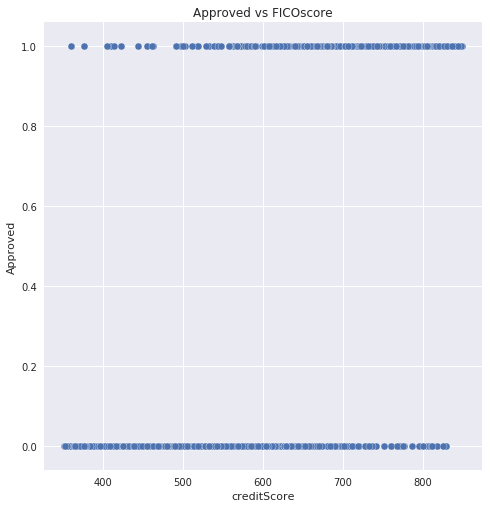

In [3]:
creditScore = []
for i in range(0,1000):
    creditScore.append(random.randrange(350,850))
    
fico_df = pd.DataFrame({'creditScore': creditScore})
fico_df['Approved'] = fico_df['creditScore'].apply(approval)
ax = sns.pairplot(x_vars = 'creditScore', y_vars = 'Approved', data = fico_df, size=7)
plt.title('Approved vs FICOscore')

In [4]:
fico_df.head()

,creditScore,Approved
0,774,1
1,666,1
2,699,1
3,763,1
4,746,1


In [5]:
X = fico_df[['creditScore']]
#X = X.reshape(1,-1)
y = (fico_df['Approved'])
lm = LogisticRegression()
lm.fit(X,y)
predictions = lm.predict(X)
#print(predictions)[0:5]
print("R Squared = {}".format(lm.score(X,y))) # This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.
print("y-intercept = {}".format(lm.intercept_))
lm.coef_

R Squared = 0.836
y-intercept = [-7.75580899]


array([[0.01211848]])

In [7]:
X = fico_df[['creditScore']]
y = fico_df['Approved']
fs.chi2(X,y)
fs.f_regression(X,y)

(array([901.58134549]), array([1.20077893e-141]))

In [8]:
Selector_f = SelectPercentile(fs.f_regression, percentile=95)
Selector_f.fit(X,y)

Selector_f.scores_


array([901.58134549])